# Simple Recommender System for Job Matching

### Introduction

Program ini merupakan salah satu implementasi dari recommender system - content based yang dapat digunakan dalam proses rekrutmen kandidat dalam posisi pekerjaan dan dalam konteks lain dapat pula membantu kandidat dalam mendapatkan rekomendasi lowongan pekerjaan yang sekiranya relevan dengan karakteristiknya. recommender system ini bertujuan untuk membantu perusahaan atau organisasi dalam mencocokkan kandidat yang memiliki keterampilan dan pengalaman yang sesuai dengan pekerjaan yang ditawarkan dan sebaliknya pula dapat diterapkan untuk para kandidat untuk mendapatkan rekomendasi lowongan yang ada berdasarkan kemampuannya. 

Secara umum, mencari kandidat yang tepat untuk suatu posisi pekerjaan dapat menjadi tugas yang rumit jika dilakukan dengan cara manual yang terkesan banyak memakan waktu dan kurang efisien dan bagi kandidat pula tidak bisa lebih jauh mengekplorasi potensi yang dimiliki untuk segera mendapatkan pekerjaan. **JobLibrary.weha** Sebagai perusahaan platform berbasis online yang mempertemukan antara pencari kerja dan penyedia lapangan kerja sering kali memiliki banyak pekerjaan yang berbeda dengan persyaratan yang beragam. Di sisi lain, kandidat memiliki beragam keterampilan dan pengalaman. Oleh karena itu, penting untuk memiliki alat yang dapat membantu mencocokkan kandidat dengan pekerjaan yang sesuai dengan keterampilan dan pengalaman mereka.

### Solusi

* Untuk mengatasi permasalahan ini, kami telah mengembangkan sebuah Recommender System - Content Based. Sistem ini menggunakan data keterampilan dan atribut lainnya dari kandidat dan pekerjaan yang tersedia untuk merekomendasikan posisi yang cocok untuk setiap kandidat. Ini tidak hanya membantu perusahaan dalam mencocokkan kandidat dengan pekerjaan yang sesuai, tetapi juga meningkatkan pengalaman kandidat dalam mencari pekerjaan yang sesuai dengan kemampuan mereka.

### Cara Kerja

* Pemrosesan Data: Data kandidat dan pekerjaan diambil dan diolah terlebih dahulu. Keterampilan (Skills) dari kandidat dan pekerjaan diubah menjadi representasi vektor TF-IDF. Selain itu, atribut seperti YearsOfExperience dan EnglishLevel dinormalisasi.

* Model Pemilihan Posisi: Model Logistic Regression digunakan untuk melakukan klasifikasi dengan menggunakan multiclass. Model ini dilatih menggunakan data pekerjaan dan labelnya (UsersPosition).

* Prediksi dan Kemiripan Konten: Setelah model dilatih, model ini digunakan untuk memprediksi posisi yang cocok untuk kandidat berdasarkan kemiripan konten (keterampilan dan atribut lainnya) antara kandidat dan pekerjaan. Selain itu, sistem juga menghitung kemiripan antara kandidat dan pekerjaan menggunakan cosine similarity. Ini membantu mengidentifikasi pekerjaan yang paling mirip dengan kandidat.

* Evaluasi: Program ini juga memberikan evaluasi melalui beberapa metrik. Diantaranya adalah tingkat akurasi (accuracy) untuk melihat sejauh mana model dapat memprediksi dengan benar, presisi (precision) untuk melihat berapa proporsi dari prediksi yang benar, recall untuk melihat berapa proporsi dari kandidat yang benar-benar sesuai yang ditemukan oleh model, F1 score yang merupakan perpaduan antara presisi dan recall untuk memberikan informasi lebih rinci tentang kinerja model.

### Business Metrics

* Efisiensi: Seberapa cepat dan efisien perusahaan dapat mencocokkan kandidat dengan posisi yang sesuai. 
* Peningkatan Pengalaman Kandidat: Bagaimana program ini membantu kandidat dalam mencari pekerjaan yang sesuai dengan kemampuan mereka. 
* Peningkatan Retensi Karyawan: Jika kandidat cocok dengan posisinya, maka kemungkinan besar akan meningkatkan retensi karyawan. 

### Machine Learning Metrics
* Precision mengukur sejauh mana hasil positif yang diprediksi oleh model benar-benar positif. Hasil positif adalah ketika model memprediksi posisi userID dengan benar. Dalam konteks ini, precision menampilkan seberapa baik model dalam mengidentifikasi kandidat yang sesuai dengan posisi yang ditawarkan. Semakin tinggi nilai precision, semakin sedikit kandidat yang salah diklasifikasikan sebagai sesuai (mengurangi "false positif").
* Penggunaan precision sangat penting terutama jika biaya false positif tinggi dalam bisnis. Misalnya, jika digunakan dalam proses rekrutmen, precision yang tinggi akan memastikan bahwa kandidat yang Anda panggil untuk wawancara benar-benar sesuai dengan posisi yang Anda butuhkan.

Program ini merupakan solusi inovatif untuk permasalahan pencocokan kandidat dengan pekerjaan yang sesuai. Dengan menggabungkan teknik pemrosesan teks dan machine learning, program ini dapat meningkatkan efisiensi rekrutmen dan pengalaman kandidat. Selain itu, metrik bisnis dan machine learning yang digunakan memungkinkan evaluasi yang baik terhadap kinerja sistem ini.

# Data Preparation

In [19]:
#Import library untuk data preparation dan visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import train test split untuk splitting data
from sklearn.model_selection import train_test_split

In [20]:
# Data Available Candidate
available_candidate = pd.read_csv('data_available.csv')
available_candidate

,UserId,Skills,YearsOfExperience,EnglishLevel
0,681426,"sql server, javascript, node.js, mongodb, reac...",0,0
1,644343,"javascript, html, rest api, entity framework, ...",13,3
2,671659,"android, sql, scrum, javascript, python, css3,...",5,0
3,645655,"sql, python, excel, data analysis, statistics,...",4,3
4,680547,"javascript, laravel, css3, docker, embedded sy...",2,4
...,...,...,...,...
2495,641256,"sql, scrum, javascript, python, spring, jboss ...",11,3
2496,658914,"ruby on rails, javascript, postgresql, node.js...",19,0
2497,646053,"html5, json, postgresql, hibernate, web develo...",13,0
2498,681539,"android, javascript, laravel, node.js, smarty ...",9,3


In [21]:
available_candidate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserId             2500 non-null   int64 
 1   Skills             2500 non-null   object
 2   YearsOfExperience  2500 non-null   int64 
 3   EnglishLevel       2500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 78.2+ KB


In [22]:
# Data Hired Candidate
hired_candidate = pd.read_csv('data_hired.csv')
hired_candidate

,UserId,Skills,YearsOfExperience,EnglishLevel,UsersPosition
0,636500,"digital art, after effects, premiere, ux, digi...",9,0,Art Director/Designer
1,655843,"javascript, hibernate, excel, junit, 3d studio...",3,0,Software developer
2,639723,"elixir, tdd, ruby on rails, python, software e...",6,0,Software Engineering
3,670895,web development,12,0,Web Designer
4,662150,"javascript, wordpress, laravel, html, css, nod...",8,3,Frontend Developer
...,...,...,...,...,...
7492,681234,"tdd, sql, javascript, python, c++, english, ht...",20,3,AWS Certified DevOps Engineer
7493,674089,"itil, software engineering, business intellige...",33,0,IT & Business Specialist Executive
7494,663564,"ruby on rails, javascript, c++, html5, bootstr...",24,0,Constantly embrace new technologies.
7495,640812,"unity, 2d, adobe illustrator, adobe after effe...",4,0,"2D/3D Game Artist, Game designer, UI/UX Designer"


In [23]:
hired_candidate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserId             7497 non-null   int64 
 1   Skills             7497 non-null   object
 2   YearsOfExperience  7497 non-null   int64 
 3   EnglishLevel       7497 non-null   int64 
 4   UsersPosition      7497 non-null   object
dtypes: int64(3), object(2)
memory usage: 293.0+ KB


In [24]:
data_for_prediction = pd.read_csv("data_for_prediction.csv")
data_for_prediction

,UserId,Skills,EnglishLevel,YearsOfExperience
0,685478,".net, sql server, javascript, typescript, angu...",0,12
1,726160,"java, bamboo, relational database, soap, ejb, ...",3,4
2,656464,"docker, oracle db, postgresql, java, git, spri...",3,10
3,673774,"angular, architectural patterns, cloud computi...",3,13
4,680888,"postgresql, architecture, junit, java, sql ser...",3,12
...,...,...,...,...
197,711288,"c#, ASP.Net MVC, .net, azure, sql server, reac...",4,8
198,679254,"react native, docker, spring mvc, spring boot,...",3,11
199,679018,"python, java, quality assurance, test automati...",3,6
200,710360,"sidekiq, javascript, rspec, sql, postgresql, r...",4,5


In [25]:
data_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserId             202 non-null    int64 
 1   Skills             202 non-null    object
 2   EnglishLevel       202 non-null    int64 
 3   YearsOfExperience  202 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


# Data Definition

**Data Available Candidate** : `data_available.csv`

<center>

|Features|Descriptions|Data Type|
|:--|:--|:--:|
|`UserId`|ID unik yang mengidentifikasi setiap kandidat yang tersedia|`int`|
|`Skills`|Daftar keterampilan yang dimiliki oleh kandidat |`string`|
|`YearsOfExperience`|jumlah tahun pengalaman kerja yang dimiliki oleh kandidat |`int`|
|`EnglishLevel`|tingkat kemampuan berbahasa Inggris dari kandidat. Ranging from `0` to `4`|`int`|

**Data Hired Candidate** : `data_hired.csv`

<center>

|Features|Descriptions|Data Type|
|:--|:--|:--:|
|`UserId`|ID unik yang mengidentifikasi setiap kandidat yang telah direkrut|`int`|
|`Skills`|daftar keterampilan yang dimiliki oleh kandidat yang telah direkrut |`string`|
|`YearsOfExperience`|jumlah tahun pengalaman kerja yang dimiliki oleh kandidat yang telah direkrut |`int`|
|`EnglishLevel`|tingkat kemampuan berbahasa Inggris yang dimiliki oleh kandidat yang telah direkrut. Ranging from `0` to `4`|`int`|
|`UsersPosition`|posisi atau jabatan pekerjaan yang diisi oleh kandidat yang telah direkrut |`string`|

**Data For Prediction** : `data_for_prediction.csv`

<center>

|Features|Descriptions|Data Type|
|:--|:--|:--:|
|`UserId`|ID unik yang mengidentifikasi setiap kandidat yang tersedia|`int`|
|`Skills`|Daftar keterampilan yang dimiliki oleh kandidat |`string`|
|`YearsOfExperience`|jumlah tahun pengalaman kerja yang dimiliki oleh kandidat |`int`|
|`EnglishLevel`|tingkat kemampuan berbahasa Inggris dari kandidat. Ranging from `0` to `4`|`int`|

## Data Validation

In [26]:
## data_available.csv
## Cek nilai null
#Menghitung nilai null pada kolom
available_candidate.isnull().sum()

UserId               0
Skills               0
YearsOfExperience    0
EnglishLevel         0
dtype: int64

In [27]:
## data_available.csv
# Check the shape of data
available_candidate.shape

(2500, 4)

In [28]:
# Check duplicate data
available_candidate.duplicated(subset = ['Skills']).sum()

5

In [29]:
# Check the duplicated data
available_candidate[available_candidate.duplicated(subset = ['Skills'])]

,UserId,Skills,YearsOfExperience,EnglishLevel
584,648415,"javascript, postgresql, crm, mongodb, digital,...",16,0
1008,636408,"ruby on rails, javascript",28,0
1257,665711,"angular, java",9,2
1429,671848,information technology,8,0
2374,667267,android,3,0


In [30]:
## data_hired.csv
## Cek nilai null
#Menghitung nilai null pada kolom
hired_candidate.isnull().sum()

UserId               0
Skills               0
YearsOfExperience    0
EnglishLevel         0
UsersPosition        0
dtype: int64

In [31]:
## data_hired.csv
# Check the shape of data
hired_candidate.shape

(7497, 5)

In [32]:
# Check duplicate data
hired_candidate.duplicated(subset = ['Skills']).sum()

36

In [33]:
# Check the duplicated data
hired_candidate[hired_candidate.duplicated(subset = ['Skills'])]

,UserId,Skills,YearsOfExperience,EnglishLevel,UsersPosition
287,668199,engineer,11,0,Engineer-builder
829,654273,javascript,5,0,Front-end developer
965,661203,machine learning,5,0,Agriculturist
1371,675572,"javascript, html5, css3, node.js, react.js",1,0,Software Developer and Technology Enthusiast
1374,670260,machine learning,12,0,"Data scientist with EXP in ML, R, NLP,Tableau."
1518,653732,engineer,11,0,Engineer automatic system
1705,649923,microsoft office,3,0,"Customer Service, Security Officer"
2322,669928,c#,9,0,Web Developer
2358,659437,microsoft office,3,0,2 Years of Experience in Customer Care Services.
3323,675450,ruby on rails,4,3,Ruby On Rails developer


## Kesimpulan data validation

* setelah diamati data memang terdapat duplicated pada beberapa userID di kolom skills, namun pada pemrosesan kali ini turut melibatkan YearsOfExperience dan EnglishLevel, dan jika dilihat dengan 3 kolom tersebut maka dapat disimpulkan bahwa data tidak terdapat duplicate

# EDA (Exploratory Data Analysis) 

### EDA data available_candidate

In [16]:
# available_candidate
# Periksa statistik deskriptif
print(available_candidate.describe())

              UserId  YearsOfExperience  EnglishLevel
count    2500.000000        2500.000000   2500.000000
mean   658575.018800           8.577600      1.476000
std     19540.498764           5.206575      1.577346
min    533344.000000           0.000000      0.000000
25%    646052.000000           5.000000      0.000000
50%    662283.000000           8.000000      0.000000
75%    672834.500000          12.000000      3.000000
max    682026.000000          38.000000      4.000000


In [17]:
# Analisis kolom numerik
print(available_candidate['YearsOfExperience'].value_counts())
print(available_candidate['EnglishLevel'].value_counts())

5     250
6     222
8     206
4     203
7     197
9     170
3     149
10    138
11    130
2     124
12    118
13    103
14     91
16     69
15     57
1      43
17     39
0      36
18     35
19     34
20     21
22     13
21     13
25      8
24      7
23      5
30      5
28      5
27      3
26      3
36      1
33      1
38      1
Name: YearsOfExperience, dtype: int64
0    1276
3     786
4     245
2     159
1      34
Name: EnglishLevel, dtype: int64


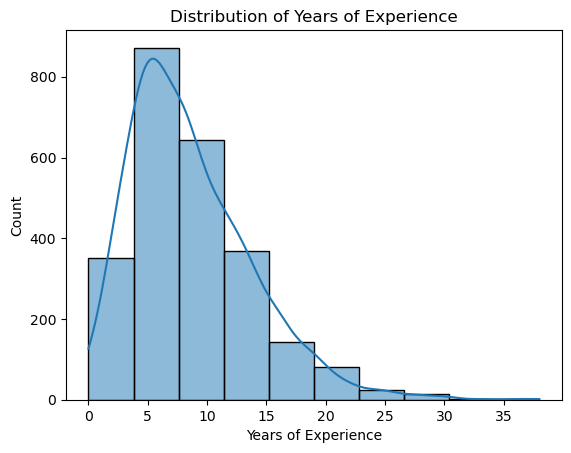

In [18]:
# Histogram YearsOfExperience
sns.histplot(available_candidate['YearsOfExperience'], bins=10, kde=True)
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Experience')
plt.show()

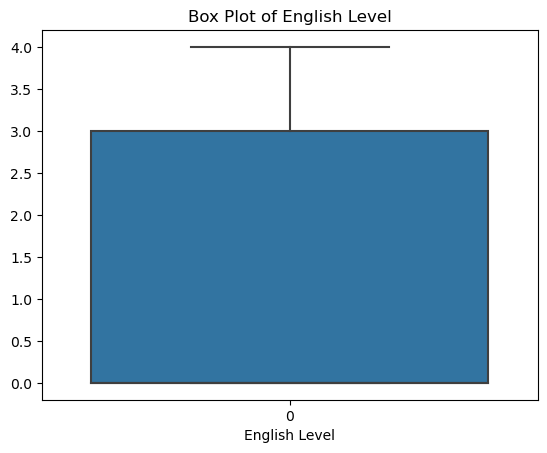

In [19]:
# Box plot EnglishLevel
sns.boxplot(available_candidate['EnglishLevel'])
plt.xlabel('English Level')
plt.title('Box Plot of English Level')
plt.show()

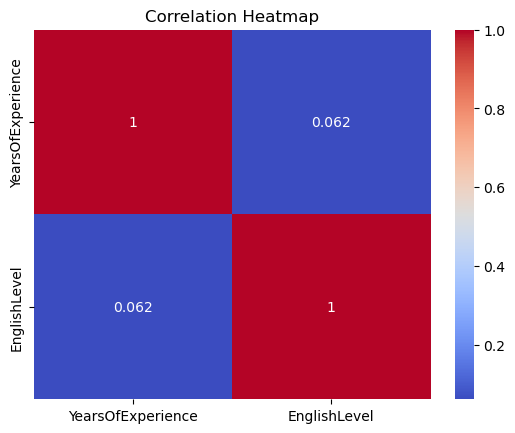

In [20]:
# Korelasi antara YearsOfExperience dan EnglishLevel
corr_matrix = available_candidate[['YearsOfExperience', 'EnglishLevel']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
import nltk
from nltk.tokenize import word_tokenize

# Menggunakan NLTK untuk tokenisasi
nltk.download('punkt')
available_candidate['Skills_Tokens'] = available_candidate['Skills'].apply(lambda x: word_tokenize(x.lower()))  # Mengonversi teks menjadi huruf kecil

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
from collections import Counter

# Menghitung frekuensi kata-kata
word_counts = Counter([word for tokens in available_candidate['Skills_Tokens'] for word in tokens])
print(word_counts.most_common(10))  # Menampilkan 10 kata paling umum

[(',', 37667), ('sql', 1518), ('javascript', 1146), ('java', 943), ('html5', 797), ('server', 753), ('api', 654), ('development', 625), ('git', 608), ('php', 601)]


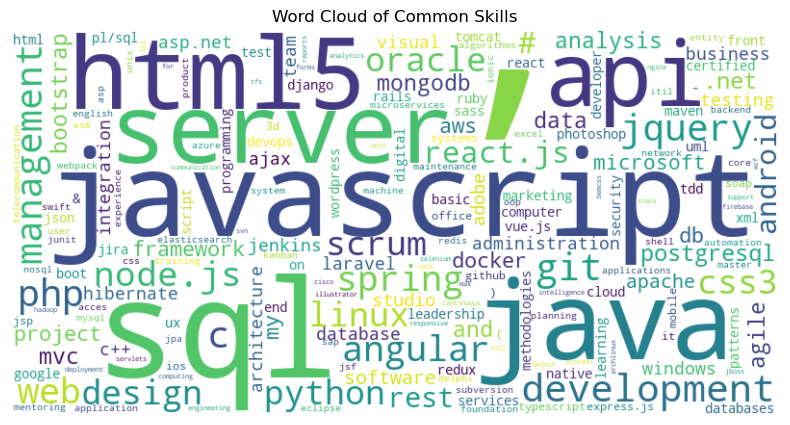

In [23]:
from wordcloud import WordCloud

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Skills')
plt.show()

In [24]:
from nltk.util import ngrams

# Menghitung frekuensi n-gram
n = 2  # Contoh untuk bigram (n=2)
bigrams = list(ngrams([word for tokens in available_candidate['Skills_Tokens'] for word in tokens], n))
bigram_counts = Counter(bigrams)
print(bigram_counts.most_common(10))  # Menampilkan 10 bigram paling umum

[(('javascript', ','), 1144), ((',', 'java'), 918), (('sql', ','), 888), (('html5', ','), 795), ((',', 'javascript'), 747), ((',', 'html5'), 696), (('server', ','), 656), (('api', ','), 643), ((',', 'git'), 608), ((',', 'php'), 599)]


#### Kesimpulan EDA data available_candidate

* terdapat 250 kandidat yang memiliki YearsOfExperience 5 tahun yang merupakan kandidat dengan YearsOfExperience terbanyak.
* terdapat 1276 kandidat yang memiliki EnglishLevel 0 tahun yang merupakan kandidat dengan EnglishLevel terbanyak.
* YearsOfExperience memiliki distibusi data skewed right
* javascript, java, sql, html5, html5, server, api, git, php merupakan 10 bigram paling umum
* YearsOfExperience dan EnglishLevel memiliki korelasi positif namun rendah

### EDA data hired_candidate

In [34]:
# Periksa statistik deskriptif
print(hired_candidate.describe())

              UserId  YearsOfExperience  EnglishLevel
count    7497.000000        7497.000000   7497.000000
mean   658944.661331           8.544084      1.475657
std     18951.807180           5.163181      1.585344
min    533334.000000           0.000000      0.000000
25%    646578.000000           5.000000      0.000000
50%    662558.000000           8.000000      0.000000
75%    672985.000000          11.000000      3.000000
max    682045.000000          50.000000      4.000000


In [35]:
# Analisis kolom numerik
print(hired_candidate['YearsOfExperience'].value_counts())
print(hired_candidate['EnglishLevel'].value_counts())

# Analisis kolom kategori
print(hired_candidate['UsersPosition'].value_counts())

5     662
8     649
6     622
7     605
4     605
9     571
3     482
11    454
10    396
12    376
2     362
13    295
14    282
15    197
1     147
16    125
17    113
18    110
0     104
19     88
20     64
21     42
22     29
23     28
24     20
25     20
26     10
28      7
30      5
27      5
29      4
33      4
32      3
31      2
37      2
34      2
48      1
45      1
50      1
39      1
38      1
Name: YearsOfExperience, dtype: int64
0    3856
3    2361
4     756
2     432
1      92
Name: EnglishLevel, dtype: int64
Software Engineer                                   354
Software Developer                                  290
Full Stack Developer                                206
Senior Software Engineer                            111
Web Developer                                        82
                                                   ... 
DBA\ SQL Developer\ BI Developer                      1
IT Manger | Data Analyst                              1
Software Developer sk

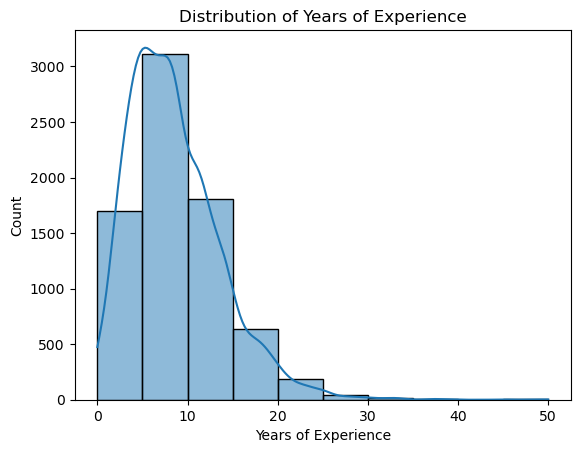

In [27]:
# Histogram YearsOfExperience
sns.histplot(hired_candidate['YearsOfExperience'], bins=10, kde=True)
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Experience')
plt.show()

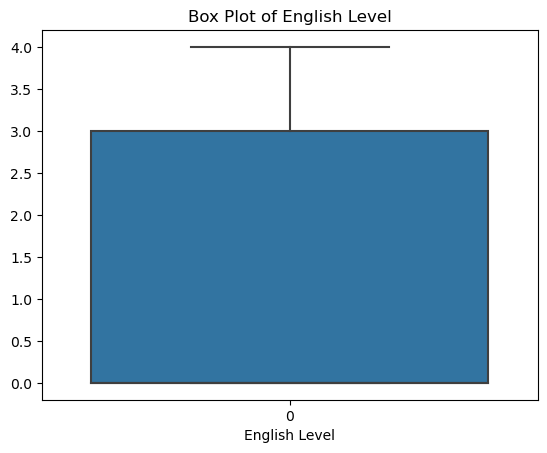

In [28]:
# Box plot EnglishLevel
sns.boxplot(hired_candidate['EnglishLevel'])
plt.xlabel('English Level')
plt.title('Box Plot of English Level')
plt.show()

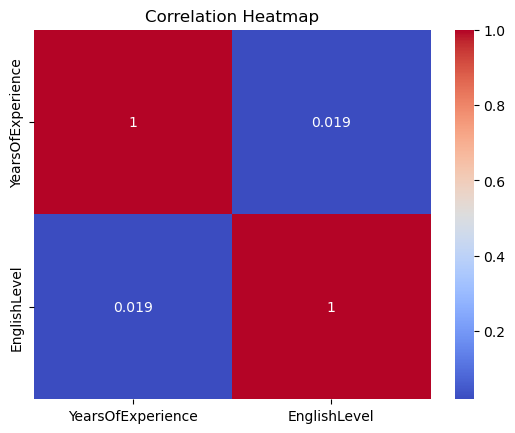

In [29]:
# Korelasi antara YearsOfExperience dan EnglishLevel
corr_matrix = hired_candidate[['YearsOfExperience', 'EnglishLevel']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
import nltk
from nltk.tokenize import word_tokenize

# Menggunakan NLTK untuk tokenisasi
nltk.download('punkt')
hired_candidate['Skills_Tokens'] = hired_candidate['Skills'].apply(lambda x: word_tokenize(x.lower()))  # Mengonversi teks menjadi huruf kecil

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
from collections import Counter

# Menghitung frekuensi kata-kata
word_counts_hired = Counter([word for tokens in hired_candidate['Skills_Tokens'] for word in tokens])
print(word_counts_hired.most_common(10))  # Menampilkan 10 kata paling umum

[(',', 112430), ('sql', 4540), ('javascript', 3482), ('java', 2767), ('html5', 2289), ('server', 2202), ('development', 2075), ('api', 2010), ('php', 1891), ('management', 1814)]


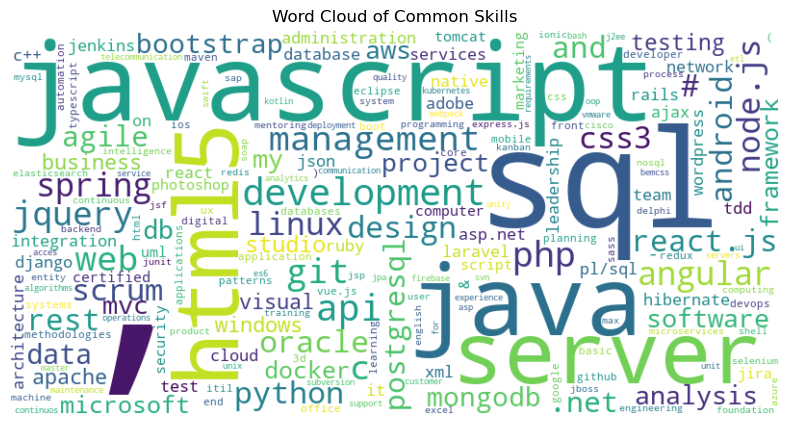

In [32]:
from wordcloud import WordCloud

# Membuat Word Cloud
wordcloud_hired = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_hired)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_hired, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Skills')
plt.show()

In [33]:
from nltk.util import ngrams

# Menghitung frekuensi n-gram
n = 2  # Contoh untuk bigram (n=2)
bigrams_hired = list(ngrams([word for tokens in hired_candidate['Skills_Tokens'] for word in tokens], n))
bigram_hired_counts = Counter(bigrams_hired)
print(bigram_hired_counts.most_common(10))  # Menampilkan 10 bigram paling umum

[(('javascript', ','), 3478), ((',', 'java'), 2712), (('sql', ','), 2693), ((',', 'javascript'), 2292), (('html5', ','), 2287), ((',', 'html5'), 1981), (('api', ','), 1968), (('server', ','), 1925), ((',', 'php'), 1888), ((',', 'git'), 1784)]


#### Kesimpulan EDA data hired_candidate

* terdapat 662 kandidat yang memiliki YearsOfExperience 5 tahun yang merupakan kandidat dengan YearsOfExperience terbanyak.
* terdapat 3856 kandidat yang memiliki EnglishLevel 0 tahun yang merupakan kandidat dengan EnglishLevel terbanyak.
* YearsOfExperience memiliki distibusi data skewed right
* UserPosition yang terbanyak berada pada pekerjaan Software Engineer sebanyak 354, Software Developer sebanyak 290, dan Full Stack Developer sebanyak 206
* javascript, java, sql, html5, api, server, php, git merupakan 10 bigram paling umum
* YearsOfExperience dan EnglishLevel memiliki korelasi positif namun rendah

## Data Prepocessing

In [34]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [35]:
# Inisialisasi vektorizer TF-IDF
vectorizer = TfidfVectorizer()

In [36]:
# Transformasi data latih (Skills) menjadi vektor TF-IDF
tfidf_hired_candidate_skills = vectorizer.fit_transform(hired_candidate['Skills'])

In [37]:
# Transformasi data kandidat (Skills) menjadi vektor TF-IDF
tfidf_available_candidate_skills = vectorizer.transform(available_candidate['Skills'])

In [38]:
# Normalisasi YearsOfExperience dan EnglishLevel
scaler = StandardScaler()
hired_candidate[['YearsOfExperience', 'EnglishLevel']] = scaler.fit_transform(hired_candidate[['YearsOfExperience', 'EnglishLevel']])
available_candidate[['YearsOfExperience', 'EnglishLevel']] = scaler.transform(available_candidate[['YearsOfExperience', 'EnglishLevel']])

In [39]:
# Menggabungkan vektor TF-IDF dengan YearsOfExperience dan EnglishLevel
tfidf_hired_combined = np.hstack((tfidf_hired_candidate_skills.toarray(), hired_candidate[['YearsOfExperience', 'EnglishLevel']].values))
tfidf_available_combined = np.hstack((tfidf_available_candidate_skills.toarray(), available_candidate[['YearsOfExperience', 'EnglishLevel']].values))

### Menggunakan Fungsi

In [40]:
def preprocess_data(available_candidate, hired_candidate):
    # Inisialisasi vektorizer TF-IDF
    vectorizer = TfidfVectorizer()

    # Transformasi data latih (Skills) menjadi vektor TF-IDF
    tfidf_hired_candidate_skills = vectorizer.fit_transform(hired_candidate['Skills'])

    # Transformasi data kandidat (Skills) menjadi vektor TF-IDF
    tfidf_available_candidate_skills = vectorizer.transform(available_candidate['Skills'])

    # Normalisasi YearsOfExperience dan EnglishLevel
    scaler = StandardScaler()
    hired_candidate[['YearsOfExperience', 'EnglishLevel']] = scaler.fit_transform(hired_candidate[['YearsOfExperience', 'EnglishLevel']])
    available_candidate[['YearsOfExperience', 'EnglishLevel']] = scaler.transform(available_candidate[['YearsOfExperience', 'EnglishLevel']])

    # Menggabungkan vektor TF-IDF dengan YearsOfExperience dan EnglishLevel
    tfidf_hired_combined = np.hstack((tfidf_hired_candidate_skills.toarray(), hired_candidate[['YearsOfExperience', 'EnglishLevel']].values))
    tfidf_available_combined = np.hstack((tfidf_available_candidate_skills.toarray(), available_candidate[['YearsOfExperience', 'EnglishLevel']].values))
    
    return tfidf_hired_combined, tfidf_available_combined

In [41]:
tfidf_hired_combined, tfidf_available_combined = preprocess_data(available_candidate, hired_candidate)

## Data Modeling

## Menggunakan LogisticRegression

### End to End tanpa menggunakan fungsi

In [ ]:
"""
# Inisialisasi vektorizer TF-IDF
vectorizer = TfidfVectorizer()

# Transformasi data latih (Skills) menjadi vektor TF-IDF
tfidf_hired_combined = vectorizer.fit_transform(hired_candidate['Skills'])

# Transformasi data kandidat (Skills) menjadi vektor TF-IDF
tfidf_available_combined = vectorizer.transform(available_candidate['Skills'])

# Normalisasi YearsOfExperience dan EnglishLevel
scaler = StandardScaler()
hired_candidate[['YearsOfExperience', 'EnglishLevel']] = scaler.fit_transform(hired_candidate[['YearsOfExperience', 'EnglishLevel']])
available_candidate[['YearsOfExperience', 'EnglishLevel']] = scaler.transform(available_candidate[['YearsOfExperience', 'EnglishLevel']])

# Menggabungkan vektor TF-IDF dengan YearsOfExperience dan EnglishLevel
tfidf_hired_combined = np.hstack((tfidf_hired_combined.toarray(), hired_candidate[['YearsOfExperience', 'EnglishLevel']].values))
tfidf_available_combined = np.hstack((tfidf_available_combined.toarray(), available_candidate[['YearsOfExperience', 'EnglishLevel']].values))

# Menggunakan Logistic Regression untuk klasifikasi
model = LogisticRegression()
model.fit(tfidf_hired_combined, hired_candidate['UsersPosition'])  # Melatih model dengan data lowongan

# Melakukan prediksi
predictions = model.predict(tfidf_available_combined)

# Mendefinisikan kamus position_mapping
position_mapping = {position: i for i, position in enumerate(hired_candidate['UsersPosition'].unique())}

# Mengembalikan nama kelas
predictions = [position_mapping[i] for i in predictions]

# Menginisialisasi kolom hasil prediksi untuk kemiripan teratas
for i in range(1, 5):
    available_candidate[f'Top_{i}_UsersPosition'] = np.nan
    available_candidate[f'Top_{i}_Similarity'] = np.nan

# Mengisi kolom hasil prediksi untuk kemiripan teratas
for i in range(len(available_candidate)):
    similarities = cosine_similarity(tfidf_available_combined[i].reshape(1, -1), tfidf_hired_combined)
    top_indices = similarities.argsort()[0][-4:][::-1]
    top_positions = [hired_candidate['UsersPosition'].iloc[idx] for idx in top_indices]
    top_similarities = similarities[0][top_indices]
    for j in range(4):  # Ambil 4 kemiripan teratas
        available_candidate.at[i, f'Top_{j+1}_UsersPosition'] = top_positions[j]
        available_candidate.at[i, f'Top_{j+1}_Similarity'] = top_similarities[j]

# Tampilkan hasil prediksi
print(available_candidate[['UserId', 'Top_1_UsersPosition', 'Top_1_Similarity', 'Top_2_UsersPosition', 'Top_2_Similarity', 'Top_3_UsersPosition', 'Top_3_Similarity', 'Top_4_UsersPosition', 'Top_4_Similarity']])
"""

### Menggunakan Fungsi

In [42]:
def train_and_predict(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate):
    # Menggunakan Logistic Regression untuk klasifikasi
    model = LogisticRegression(random_state = 123)
    model.fit(tfidf_hired_combined, hired_candidate['UsersPosition'])  # Melatih model dengan data lowongan

    # Melakukan prediksi
    predictions = model.predict(tfidf_available_combined)

    # Mendefinisikan kamus position_mapping
    position_mapping = {position: i for i, position in enumerate(hired_candidate['UsersPosition'].unique())}

    # Mengembalikan nama kelas
    predictions = [position_mapping[i] for i in predictions]

    # Menginisialisasi kolom hasil prediksi untuk kemiripan teratas
    for i in range(1, 5):
        available_candidate[f'Top_{i}_UsersPosition'] = np.nan
        available_candidate[f'Top_{i}_Similarity'] = np.nan

    # Mengisi kolom hasil prediksi untuk kemiripan teratas
    for i in range(len(available_candidate)):
        similarities = cosine_similarity(tfidf_available_combined[i].reshape(1, -1), tfidf_hired_combined)
        top_indices = similarities.argsort()[0][-4:][::-1]
        top_positions = [hired_candidate['UsersPosition'].iloc[idx] for idx in top_indices]
        top_similarities = similarities[0][top_indices]
        for j in range(4):  # Ambil 4 kemiripan teratas
            available_candidate.at[i, f'Top_{j+1}_UsersPosition'] = top_positions[j]
            available_candidate.at[i, f'Top_{j+1}_Similarity'] = top_similarities[j]

    return available_candidate

In [43]:
result = train_and_predict(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# Tampilkan hasil prediksi
print(result[['UserId', 'Top_1_UsersPosition', 'Top_1_Similarity', 'Top_2_UsersPosition', 'Top_2_Similarity', 'Top_3_UsersPosition', 'Top_3_Similarity', 'Top_4_UsersPosition', 'Top_4_Similarity']])

      UserId                               Top_1_UsersPosition  \
0     681426             Full Stack Developer/Mobile Developer   
1     644343                         Web Application Developer   
2     671659                          Junior Analyst FullStack   
3     645655  Architecting Web Applications for Fun and Profit   
4     680547  Architecting Web Applications for Fun and Profit   
...      ...                                               ...   
2495  641256                 Software Architect/ Web Developer   
2496  658914                                          Back-End   
2497  646053          Passionate Java and Full Stack Developer   
2498  681539            Project Manager | Senior PHP Developer   
2499  662853                            IOS Software Developer   

      Top_1_Similarity                          Top_2_UsersPosition  \
0             0.914008                          JavaScript Engineer   
1             0.811547     Database Administrator  - MS SQL Serve

In [56]:
def evaluation_metrics_logreg(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate, target):
    # Menggunakan Logistic Regression untuk klasifikasi
    model = LogisticRegression(random_state=123)
    model.fit(tfidf_hired_combined, hired_candidate['UsersPosition'])  # Melatih model dengan data lowongan

    # Melakukan prediksi
    predictions = model.predict(tfidf_available_combined)

    # Menghitung precision, recall, dan f1-score
    precision = precision_score(target, predictions, average='weighted')
    recall = recall_score(target, predictions, average='weighted')
    f1 = f1_score(target, predictions, average='weighted')

    # Mendefinisikan kamus position_mapping
    position_mapping = {position: i for i, position in enumerate(hired_candidate['UsersPosition'].unique())}

    # Mengembalikan nama kelas
    predictions = [position_mapping[i] for i in predictions]

    # Menginisialisasi kolom hasil prediksi untuk kemiripan teratas
    for i in range(1, 5):
        available_candidate[f'Top_{i}_UsersPosition'] = np.nan
        available_candidate[f'Top_{i}_Similarity'] = np.nan

    # Mengisi kolom hasil prediksi untuk kemiripan teratas
    for i in range(len(available_candidate)):
        similarities = cosine_similarity(tfidf_available_combined[i].reshape(1, -1), tfidf_hired_combined)
        top_indices = similarities.argsort()[0][-4:][::-1]
        top_positions = [hired_candidate['UsersPosition'].iloc[idx] for idx in top_indices]
        top_similarities = similarities[0][top_indices]
        for j in range(4):  # Ambil 4 kemiripan teratas
            available_candidate.at[i, f'Top_{j+1}_UsersPosition'] = top_positions[j]
            available_candidate.at[i, f'Top_{j+1}_Similarity'] = top_similarities[j]

    return available_candidate, precision, recall, f1


In [57]:
# Memasukkan data target yang sesuai
target = available_candidate['Top_1_UsersPosition']

# Melakukan prediksi dan menghitung evaluation metrics
result, precision, recall, f1 = evaluation_metrics_logreg(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate, target)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_

Precision: 0.02105369730527589
Recall: 0.0648
F1-score: 0.02385216442251687


## Menggunakan RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(tfidf_hired_combined, hired_candidate['UsersPosition'])  # Melatih model dengan data lowongan

In [ ]:
# Melakukan prediksi
predictions = model.predict(tfidf_available_combined)

In [ ]:
# Mendefinisikan kamus position_mapping
position_mapping = {position: i for i, position in enumerate(hired_candidate['UsersPosition'].unique())}

In [ ]:
# Mengembalikan nama kelas
predictions = [position_mapping[i] for i in predictions]

In [ ]:
# Menginisialisasi kolom hasil prediksi untuk kemiripan teratas
for i in range(1, 5):
    available_candidate[f'Top_{i}_UsersPosition'] = np.nan
    available_candidate[f'Top_{i}_Similarity'] = np.nan

In [ ]:
# Mengisi kolom hasil prediksi untuk kemiripan teratas
for i in range(len(available_candidate)):
    similarities = cosine_similarity(tfidf_available_combined[i].reshape(1, -1), tfidf_hired_combined)
    top_indices = similarities.argsort()[0][-4:][::-1]
    top_positions = [hired_candidate['UsersPosition'].iloc[idx] for idx in top_indices]
    top_similarities = similarities[0][top_indices]
    for j in range(4):  # Ambil 4 kemiripan teratas
        available_candidate.at[i, f'Top_{j+1}_UsersPosition'] = top_positions[j]
        available_candidate.at[i, f'Top_{j+1}_Similarity'] = top_similarities[j]

## Fungsi RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [61]:
def train_and_predict_rf(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate):
    # Menggunakan Random Forest Classifier untuk klasifikasi
    model = RandomForestClassifier(random_state=123)
    model.fit(tfidf_hired_combined, hired_candidate['UsersPosition'])  # Melatih model dengan data lowongan

    # Melakukan prediksi
    predictions = model.predict(tfidf_available_combined)

    # Mendefinisikan kamus position_mapping
    position_mapping = {position: i for i, position in enumerate(hired_candidate['UsersPosition'].unique())}

    # Mengembalikan nama kelas
    predictions = [position_mapping[i] for i in predictions]

    # Menginisialisasi kolom hasil prediksi untuk kemiripan teratas
    for i in range(1, 5):
        available_candidate[f'Top_{i}_UsersPosition'] = np.nan
        available_candidate[f'Top_{i}_Similarity'] = np.nan

    # Mengisi kolom hasil prediksi untuk kemiripan teratas
    for i in range(len(available_candidate)):
        similarities = cosine_similarity(tfidf_available_combined[i].reshape(1, -1), tfidf_hired_combined)
        top_indices = similarities.argsort()[0][-4:][::-1]
        top_positions = [hired_candidate['UsersPosition'].iloc[idx] for idx in top_indices]
        top_similarities = similarities[0][top_indices]
        for j in range(4):  # Ambil 4 kemiripan teratas
            available_candidate.at[i, f'Top_{j+1}_UsersPosition'] = top_positions[j]
            available_candidate.at[i, f'Top_{j+1}_Similarity'] = top_similarities[j]

    return available_candidate

In [62]:
# Menggunakan model Random Forest
result_rf = train_and_predict_rf(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate)

In [63]:
# Tampilkan hasil prediksi
print(result_rf[['UserId', 'Top_1_UsersPosition', 'Top_1_Similarity', 'Top_2_UsersPosition', 'Top_2_Similarity', 'Top_3_UsersPosition', 'Top_3_Similarity', 'Top_4_UsersPosition', 'Top_4_Similarity']])

      UserId                               Top_1_UsersPosition  \
0     681426             Full Stack Developer/Mobile Developer   
1     644343                         Web Application Developer   
2     671659                          Junior Analyst FullStack   
3     645655  Architecting Web Applications for Fun and Profit   
4     680547  Architecting Web Applications for Fun and Profit   
...      ...                                               ...   
2495  641256                 Software Architect/ Web Developer   
2496  658914                                          Back-End   
2497  646053          Passionate Java and Full Stack Developer   
2498  681539            Project Manager | Senior PHP Developer   
2499  662853                            IOS Software Developer   

      Top_1_Similarity                          Top_2_UsersPosition  \
0             0.914008                          JavaScript Engineer   
1             0.811547     Database Administrator  - MS SQL Serve

In [64]:
from sklearn.ensemble import RandomForestClassifier

def evaluation_metrics_random_forest(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate, target):
    # Menggunakan RandomForestClassifier untuk klasifikasi
    model = RandomForestClassifier(random_state=123)
    model.fit(tfidf_hired_combined, hired_candidate['UsersPosition'])  # Melatih model dengan data lowongan

    # Melakukan prediksi
    predictions = model.predict(tfidf_available_combined)

    # Menghitung precision, recall, dan f1-score
    precision = precision_score(target, predictions, average='weighted')
    recall = recall_score(target, predictions, average='weighted')
    f1 = f1_score(target, predictions, average='weighted')

    # Mendefinisikan kamus position_mapping
    position_mapping = {position: i for i, position in enumerate(hired_candidate['UsersPosition'].unique())}

    # Mengembalikan nama kelas
    predictions = [position_mapping[i] for i in predictions]

    # Menginisialisasi kolom hasil prediksi untuk kemiripan teratas
    for i in range(1, 5):
        available_candidate[f'Top_{i}_UsersPosition'] = np.nan
        available_candidate[f'Top_{i}_Similarity'] = np.nan

    # Mengisi kolom hasil prediksi untuk kemiripan teratas
    for i in range(len(available_candidate)):
        similarities = cosine_similarity(tfidf_available_combined[i].reshape(1, -1), tfidf_hired_combined)
        top_indices = similarities.argsort()[0][-4:][::-1]
        top_positions = [hired_candidate['UsersPosition'].iloc[idx] for idx in top_indices]
        top_similarities = similarities[0][top_indices]
        for j in range(4):  # Ambil 4 kemiripan teratas
            available_candidate.at[i, f'Top_{j+1}_UsersPosition'] = top_positions[j]
            available_candidate.at[i, f'Top_{j+1}_Similarity'] = top_similarities[j]

    return available_candidate, precision, recall, f1

In [65]:
# Memasukkan data target yang sesuai
target = available_candidate['Top_1_UsersPosition']

# Melakukan prediksi dan menghitung evaluation metrics dengan RandomForestClassifier
result, precision, recall, f1 = evaluation_metrics_random_forest(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate, target)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.1306621791017092
Recall: 0.0988
F1-score: 0.07631511838637012


## SVC Modell

In [66]:
from sklearn.svm import SVC

def train_and_predict_svc(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate):
    # Menggunakan Support Vector Classifier untuk klasifikasi
    model = SVC(random_state=123)
    model.fit(tfidf_hired_combined, hired_candidate['UsersPosition'])  # Melatih model dengan data lowongan

    # Melakukan prediksi
    predictions = model.predict(tfidf_available_combined)

    # Mendefinisikan kamus position_mapping
    position_mapping = {position: i for i, position in enumerate(hired_candidate['UsersPosition'].unique())}

    # Mengembalikan nama kelas
    predictions = [position_mapping[i] for i in predictions]

    # Menginisialisasi kolom hasil prediksi untuk kemiripan teratas
    for i in range(1, 5):
        available_candidate[f'Top_{i}_UsersPosition'] = np.nan
        available_candidate[f'Top_{i}_Similarity'] = np.nan

    # Mengisi kolom hasil prediksi untuk kemiripan teratas
    for i in range(len(available_candidate)):
        similarities = cosine_similarity(tfidf_available_combined[i].reshape(1, -1), tfidf_hired_combined)
        top_indices = similarities.argsort()[0][-4:][::-1]
        top_positions = [hired_candidate['UsersPosition'].iloc[idx] for idx in top_indices]
        top_similarities = similarities[0][top_indices]
        for j in range(4):  # Ambil 4 kemiripan teratas
            available_candidate.at[i, f'Top_{j+1}_UsersPosition'] = top_positions[j]
            available_candidate.at[i, f'Top_{j+1}_Similarity'] = top_similarities[j]

    return available_candidate

In [67]:
# Menggunakan model Support Vector Classifier (SVC)
result_svc = train_and_predict_svc(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate)

In [68]:
# Tampilkan hasil prediksi
print(result_svc[['UserId', 'Top_1_UsersPosition', 'Top_1_Similarity', 'Top_2_UsersPosition', 'Top_2_Similarity', 'Top_3_UsersPosition', 'Top_3_Similarity', 'Top_4_UsersPosition', 'Top_4_Similarity']])

      UserId                               Top_1_UsersPosition  \
0     681426             Full Stack Developer/Mobile Developer   
1     644343                         Web Application Developer   
2     671659                          Junior Analyst FullStack   
3     645655  Architecting Web Applications for Fun and Profit   
4     680547  Architecting Web Applications for Fun and Profit   
...      ...                                               ...   
2495  641256                 Software Architect/ Web Developer   
2496  658914                                          Back-End   
2497  646053          Passionate Java and Full Stack Developer   
2498  681539            Project Manager | Senior PHP Developer   
2499  662853                            IOS Software Developer   

      Top_1_Similarity                          Top_2_UsersPosition  \
0             0.914008                          JavaScript Engineer   
1             0.811547     Database Administrator  - MS SQL Serve

In [69]:
from sklearn.svm import SVC

def evaluation_metrics_svc(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate, target):
    # Menggunakan Support Vector Classifier (SVC) untuk klasifikasi
    model = SVC(random_state=123)
    model.fit(tfidf_hired_combined, hired_candidate['UsersPosition'])  # Melatih model dengan data lowongan

    # Melakukan prediksi
    predictions = model.predict(tfidf_available_combined)

    # Menghitung precision, recall, dan f1-score
    precision = precision_score(target, predictions, average='weighted')
    recall = recall_score(target, predictions, average='weighted')
    f1 = f1_score(target, predictions, average='weighted')

    # Mendefinisikan kamus position_mapping
    position_mapping = {position: i for i, position in enumerate(hired_candidate['UsersPosition'].unique())}

    # Mengembalikan nama kelas
    predictions = [position_mapping[i] for i in predictions]

    # Menginisialisasi kolom hasil prediksi untuk kemiripan teratas
    for i in range(1, 5):
        available_candidate[f'Top_{i}_UsersPosition'] = np.nan
        available_candidate[f'Top_{i}_Similarity'] = np.nan

    # Mengisi kolom hasil prediksi untuk kemiripan teratas
    for i in range(len(available_candidate)):
        similarities = cosine_similarity(tfidf_available_combined[i].reshape(1, -1), tfidf_hired_combined)
        top_indices = similarities.argsort()[0][-4:][::-1]
        top_positions = [hired_candidate['UsersPosition'].iloc[idx] for idx in top_indices]
        top_similarities = similarities[0][top_indices]
        for j in range(4):  # Ambil 4 kemiripan teratas
            available_candidate.at[i, f'Top_{j+1}_UsersPosition'] = top_positions[j]
            available_candidate.at[i, f'Top_{j+1}_Similarity'] = top_similarities[j]

    return available_candidate, precision, recall, f1

# Memasukkan data target yang sesuai
target = available_candidate['Top_1_UsersPosition']

In [70]:
# Melakukan prediksi dan menghitung evaluation metrics dengan SVC
result_svc, precision_svc, recall_svc, f1_svc = evaluation_metrics_svc(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate, target)

print(f"Precision (SVC): {precision_svc}")
print(f"Recall (SVC): {recall_svc}")
print(f"F1-score (SVC): {f1_svc}")

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (SVC): 0.011031271167908824
Recall (SVC): 0.0448
F1-score (SVC): 0.011705908255945413


## XGBOOST Model

In [74]:
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

def train_and_predict_xgboost(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate):
    # Menggunakan LabelEncoder untuk mengkodekan kategori 'UsersPosition' menjadi bilangan bulat
    label_encoder = LabelEncoder()
    hired_candidate['UsersPositionEncoded'] = label_encoder.fit_transform(hired_candidate['UsersPosition'])

    # Menggunakan XGBoost Classifier untuk klasifikasi
    model = xgb.XGBClassifier(random_state=123)
    model.fit(tfidf_hired_combined, hired_candidate['UsersPositionEncoded'])  # Melatih model dengan data lowongan

    # Melakukan prediksi
    predictions_encoded = model.predict(tfidf_available_combined)

    # Mengembalikan nama kelas dengan melakukan inverse transform
    predictions = label_encoder.inverse_transform(predictions_encoded)

    # Menginisialisasi kolom hasil prediksi untuk kemiripan teratas
    for i in range(1, 5):
        available_candidate[f'Top_{i}_UsersPosition'] = np.nan
        available_candidate[f'Top_{i}_Similarity'] = np.nan

    # Mengisi kolom hasil prediksi untuk kemiripan teratas
    for i in range(len(available_candidate)):
        similarities = cosine_similarity(tfidf_available_combined[i].reshape(1, -1), tfidf_hired_combined)
        top_indices = similarities.argsort()[0][-4:][::-1]
        top_positions = [hired_candidate['UsersPosition'].iloc[idx] for idx in top_indices]
        top_similarities = similarities[0][top_indices]
        for j in range(4):  # Ambil 4 kemiripan teratas
            available_candidate.at[i, f'Top_{j+1}_UsersPosition'] = top_positions[j]
            available_candidate.at[i, f'Top_{j+1}_Similarity'] = top_similarities[j]

    return available_candidate

In [ ]:
# Menggunakan model XGBoost
result_xgboost = train_and_predict_xgboost(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate)

# Tampilkan hasil prediksi
print(result_xgboost[['UserId', 'Top_1_UsersPosition', 'Top_1_Similarity', 'Top_2_UsersPosition', 'Top_2_Similarity', 'Top_3_UsersPosition', 'Top_3_Similarity', 'Top_4_UsersPosition', 'Top_4_Similarity']])

In [ ]:
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluation_metrics_xgboost(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate, target):
    # Menggunakan LabelEncoder untuk mengkodekan kategori 'UsersPosition' menjadi bilangan bulat
    label_encoder = LabelEncoder()
    hired_candidate['UsersPositionEncoded'] = label_encoder.fit_transform(hired_candidate['UsersPosition'])
    # Menggunakan XGBoost Classifier untuk klasifikasi
    model = xgb.XGBClassifier(random_state=123)
    model.fit(tfidf_hired_combined, hired_candidate['UsersPosition'])  # Melatih model dengan data lowongan

    # Melakukan prediksi
    predictions = model.predict(tfidf_available_combined)

    # Menghitung precision, recall, dan f1-score
    precision = precision_score(target, predictions, average='weighted')
    recall = recall_score(target, predictions, average='weighted')
    f1 = f1_score(target, predictions, average='weighted')

    # Mendefinisikan kamus position_mapping
    position_mapping = {position: i for i, position in enumerate(hired_candidate['UsersPosition'].unique())}

    # Mengembalikan nama kelas
    predictions = [position_mapping[i] for i in predictions]

    # Menginisialisasi kolom hasil prediksi untuk kemiripan teratas
    for i in range(1, 5):
        available_candidate[f'Top_{i}_UsersPosition'] = np.nan
        available_candidate[f'Top_{i}_Similarity'] = np.nan

    # Mengisi kolom hasil prediksi untuk kemiripan teratas
    for i in range(len(available_candidate)):
        similarities = cosine_similarity(tfidf_available_combined[i].reshape(1, -1), tfidf_hired_combined)
        top_indices = similarities.argsort()[0][-4:][::-1]
        top_positions = [hired_candidate['UsersPosition'].iloc[idx] for idx in top_indices]
        top_similarities = similarities[0][top_indices]
        for j in range(4):  # Ambil 4 kemiripan teratas
            available_candidate.at[i, f'Top_{j+1}_UsersPosition'] = top_positions[j]
            available_candidate.at[i, f'Top_{j+1}_Similarity'] = top_similarities[j]

    return available_candidate, precision, recall, f1

In [ ]:
# Memasukkan data target yang sesuai
target = available_candidate['Top_1_UsersPosition']

# Melakukan prediksi dan menghitung evaluation metrics dengan XGBoost
result_xgboost, precision_xgboost, recall_xgboost, f1_xgboost = evaluation_metrics_xgboost(tfidf_hired_combined, tfidf_available_combined, available_candidate, hired_candidate, target)

print(f"Precision (XGBoost): {precision_xgboost}")
print(f"Recall (XGBoost): {recall_xgboost}")
print(f"F1-score (XGBoost): {f1_xgboost}")

### Evaluation Metrics Model 

**Hasil Expreimentasi Model** :

<center>

|Model|Metrics|Value|
|:--|:--|:--:|
|`Logistics Regression`|Precision |`0.021`|
|`RandomForest`|Precision |`0.13`|
|`SVC`|Precision |`0.011`|

### Coba Prediksi menggunakan Model Terbaik dan Data Baru

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [15]:
data_for_prediction = pd.read_csv("data_for_prediction.csv")
data_for_prediction

,UserId,Skills,EnglishLevel,YearsOfExperience
0,685478,".net, sql server, javascript, typescript, angu...",0,12
1,726160,"java, bamboo, relational database, soap, ejb, ...",3,4
2,656464,"docker, oracle db, postgresql, java, git, spri...",3,10
3,673774,"angular, architectural patterns, cloud computi...",3,13
4,680888,"postgresql, architecture, junit, java, sql ser...",3,12
...,...,...,...,...
197,711288,"c#, ASP.Net MVC, .net, azure, sql server, reac...",4,8
198,679254,"react native, docker, spring mvc, spring boot,...",3,11
199,679018,"python, java, quality assurance, test automati...",3,6
200,710360,"sidekiq, javascript, rspec, sql, postgresql, r...",4,5


In [16]:
def preprocess_data_prediction(data_for_prediction, hired_candidate):
    # Inisialisasi vektorizer TF-IDF
    vectorizer = TfidfVectorizer()

    # Transformasi data latih (Skills) menjadi vektor TF-IDF
    tfidf_hired_candidate_skills = vectorizer.fit_transform(hired_candidate['Skills'])

    # Transformasi data kandidat (Skills) menjadi vektor TF-IDF
    tfidf_available_candidate_skills = vectorizer.transform(data_for_prediction['Skills'])

    # Normalisasi YearsOfExperience dan EnglishLevel
    scaler = StandardScaler()
    hired_candidate[['YearsOfExperience', 'EnglishLevel']] = scaler.fit_transform(hired_candidate[['YearsOfExperience', 'EnglishLevel']])
    data_for_prediction[['YearsOfExperience', 'EnglishLevel']] = scaler.transform(data_for_prediction[['YearsOfExperience', 'EnglishLevel']])

    # Menggabungkan vektor TF-IDF dengan YearsOfExperience dan EnglishLevel
    tfidf_hired_combined = np.hstack((tfidf_hired_candidate_skills.toarray(), hired_candidate[['YearsOfExperience', 'EnglishLevel']].values))
    tfidf_available_combined = np.hstack((tfidf_available_candidate_skills.toarray(), data_for_prediction[['YearsOfExperience', 'EnglishLevel']].values))
    
    return tfidf_hired_combined, tfidf_available_combined

In [17]:
# Menggunakan fungsi preprocess_data_prediction
tfidf_hired_combined, tfidf_available_combined = preprocess_data_prediction(data_for_prediction, hired_candidate)

In [18]:
def train_and_predict_rf(tfidf_hired_combined, tfidf_available_combined, data_for_prediction, hired_candidate):
    # Menggunakan Random Forest Classifier untuk klasifikasi
    model = RandomForestClassifier(random_state=123)
    model.fit(tfidf_hired_combined, hired_candidate['UsersPosition'])  # Melatih model dengan data lowongan

    # Melakukan prediksi
    predictions = model.predict(tfidf_available_combined)

    # Mendefinisikan kamus position_mapping
    position_mapping = {position: i for i, position in enumerate(hired_candidate['UsersPosition'].unique())}

    # Mengembalikan nama kelas
    predictions = [position_mapping[i] for i in predictions]

    # Menginisialisasi kolom hasil prediksi untuk kemiripan teratas
    for i in range(1, 5):
        data_for_prediction[f'Top_{i}_UsersPosition'] = np.nan
        data_for_prediction[f'Top_{i}_Similarity'] = np.nan

    # Mengisi kolom hasil prediksi untuk kemiripan teratas
    for i in range(len(data_for_prediction)):
        similarities = cosine_similarity(tfidf_available_combined[i].reshape(1, -1), tfidf_hired_combined)
        top_indices = similarities.argsort()[0][-4:][::-1]
        top_positions = [hired_candidate['UsersPosition'].iloc[idx] for idx in top_indices]
        top_similarities = similarities[0][top_indices]
        for j in range(4):  # Ambil 4 kemiripan teratas
            data_for_prediction.at[i, f'Top_{j+1}_UsersPosition'] = top_positions[j]
            data_for_prediction.at[i, f'Top_{j+1}_Similarity'] = top_similarities[j]

    return data_for_prediction

# Menggunakan model Random Forest
result_rf = train_and_predict_rf(tfidf_hired_combined, tfidf_available_combined, data_for_prediction, hired_candidate)

# Tampilkan hasil prediksi
print(result_rf[['UserId', 'Top_1_UsersPosition', 'Top_1_Similarity', 'Top_2_UsersPosition', 'Top_2_Similarity', 'Top_3_UsersPosition', 'Top_3_Similarity', 'Top_4_UsersPosition', 'Top_4_Similarity']])


     UserId                                Top_1_UsersPosition  \
0    685478                          Senior Software Developer   
1    726160   Architecting Web Applications for Fun and Profit   
2    656464                          Backend Software Engineer   
3    673774  Senior Software Architect/Team Lead - Payments...   
4    680888              Senior Software Engineer at Microsoft   
..      ...                                                ...   
197  711288                 Software and Application Developer   
198  679254                          Web Application Developer   
199  679018                              Software Test Analyst   
200  710360                                 Software Developer   
201  655188                          Senior Software Developer   

     Top_1_Similarity                                Top_2_UsersPosition  \
0            0.794406                      Full Stack Software Developer   
1            0.791549  Data Engineer | Senior Software 

## Kesimpulan 

* Sistem rekomendasi ini dibangun untuk membantu para perekrut maupun pekerja mendapatkan rekomendasi pekerjaan yang serupa dengan karakteristik kandidat dan perekrut dapat pula mendapatkan rekomendasi kandidat yang tepat berdasarkan kebutuhan perusahaan dengan cepat
* Sitem Rekomendasi dibangun dengan tipe Recommender System - Personalized dan Conted Based. karakteristik kandidat seperti skill, jumlah pengalaman tahun bekerja dan kemampuan bahasa inggris akan dicarikan similiaritasnya atau kesamaannya dengan kandidat yang sudah berhasil direkrut berdasarkan data historis.
* setelah diamati data memang terdapat duplicated pada beberapa userID di kolom skills, namun pada pemrosesan kali ini turut melibatkan YearsOfExperience dan EnglishLevel, dan jika dilihat dengan 3 kolom tersebut maka dapat disimpulkan bahwa data tidak terdapat duplicate.
* terdapat 662 kandidat yang telah direkrut memiliki YearsOfExperience 5 tahun dengan YearsOfExperience terbanyak, terdapat 3856 kandidat yang telah direkrut memiliki EnglishLevel 0 tahun yang merupakan kandidat dengan EnglishLevel terbanyak, UserPosition yang terbanyak berada pada pekerjaan Software Engineer sebanyak 354, Software Developer sebanyak 290, dan Full Stack Developer sebanyak 206. YearsOfExperience memiliki distibusi data skewed right. Javascript, java, sql, html5, api, server, php, git merupakan 10 bigram paling umum serta YearsOfExperience dan EnglishLevel memiliki korelasi positif namun rendah.
* lalu, hasil pemodelan menunjukan bahwa model randomforest merupakan model yang akan digunakan dalam proses prediksi ditandai dengan nilai precision yang paling tinggi yakni sebesar 0.13 dibanding model logisticregression sebesar 0.021 dan model SVC sebesar 0.011
* lalu, setelah digunakan pemodelan maka dilanjut untuk mencari similiarity antara data kandidat dan data kandidat yang telah direkrut menggunakan cosine similiarity. Selanjutnya user yang tergabung dalam data kandidat akan direkomendasikan 4 pekerjaan kandidat yang telah direkrut berdasarkan kesamaan karakteristik antara data kandidat dan data kandidat yang sudah direkrut.

# Reference

* Materi Recommender System Pacmann
* https://towardsdatascience.com/using-cosine-similarity-to-build-a-movie-recommendation-system-ae7f20842599 
* https://github.com/ngautam0/Match_Dream_Job/blob/master/data/suggestions.csv?source=post_page-----edb0e653341a--------------------------------
* Fiarni, C., & Maharani, H. (2019). Product Recommendation System Design Using Cosine Similarity and Content-based Filtering Methods. IJITEE (International Journal of Information Technology and Electrical Engineering), 3(2), 42–48. /*doi:http://dx.doi.org/10.22146/ijitee.45538*/ doi:https://doi.org/10.22146/ijitee.45538
* Yunanda, G., Nurjanah, D., & Meliana, S. (2022). Recommendation System from Microsoft News Data using TF-IDF and Cosine Similarity Methods. Building of Informatics, Technology and Science (BITS), 4(1), 277−284. https://doi.org/10.47065/bits.v4i1.1670

